# Data

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

/home/taeyong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/taeyong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def get_MNIST():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    # normalization
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    # reshape
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

    # one-hot encoding
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    return X_train, y_train, X_test, y_test

In [3]:
X_train, y_train, X_test, y_test = get_MNIST()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


# Confusion Matrix Visualization

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [6]:
class_names = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [7]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [8]:
np.set_printoptions(precision=2)

# Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.92      0.94      0.93       980
          1       0.95      0.96      0.95      1135
          2       0.87      0.85      0.86      1032
          3       0.83      0.86      0.84      1010
          4       0.88      0.87      0.88       982
          5       0.86      0.84      0.85       892
          6       0.90      0.89      0.89       958
          7       0.91      0.90      0.90      1028
          8       0.82      0.81      0.81       974
          9       0.85      0.85      0.85      1009

avg / total       0.88      0.88      0.88     10000



Normalized confusion matrix
[[9.40e-01 1.02e-03 5.10e-03 1.02e-02 5.10e-03 8.16e-03 1.02e-02 7.14e-03
  8.16e-03 5.10e-03]
 [8.81e-04 9.59e-01 8.81e-03 5.29e-03 1.76e-03 5.29e-03 5.29e-03 2.64e-03
  1.06e-02 8.81e-04]
 [9.69e-03 9.69e-03 8.54e-01 3.29e-02 1.07e-02 1.07e-02 1.26e-02 2.91e-02
  2.13e-02 9.69e-03]
 [7.92e-03 5.94e-03 3.07e-02 8.58e-01 8.91e-03 3.37e-02 1.98e-03 7.92e-03
  2.57e-02 1.88e-02]
 [3.05e-03 3.05e-03 1.12e-02 3.05e-03 8.75e-01 8.15e-03 1.63e-02 1.02e-02
  2.24e-02 4.79e-02]
 [1.68e-02 1.01e-02 7.85e-03 4.48e-02 7.85e-03 8.35e-01 2.24e-02 5.61e-03
  3.03e-02 1.91e-02]
 [1.67e-02 4.18e-03 9.39e-03 1.15e-02 1.88e-02 1.67e-02 8.87e-01 1.04e-03
  2.82e-02 6.26e-03]
 [1.95e-03 1.65e-02 2.33e-02 1.36e-02 6.81e-03 4.86e-03 1.95e-03 9.01e-01
  5.84e-03 2.43e-02]
 [9.24e-03 1.13e-02 2.77e-02 4.21e-02 1.95e-02 2.87e-02 1.75e-02 9.24e-03
  8.11e-01 2.36e-02]
 [1.09e-02 1.98e-03 8.92e-03 2.38e-02 3.87e-02 9.91e-03 6.94e-03 1.98e-02
  2.48e-02 8.54e-01]]


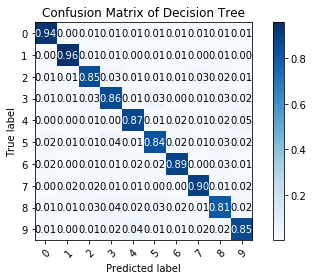

In [13]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1), classes=class_names, normalize=True,
                      title='Confusion Matrix of Decision Tree')

plt.show()

# random forest (n_estimator = 3)

In [14]:
from sklearn.ensemble import RandomForestClassifier

/home/taeyong/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
rfc = RandomForestClassifier(n_estimators=3)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
predictions = rfc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.94      0.96       980
          1       0.99      0.98      0.98      1135
          2       0.94      0.84      0.89      1032
          3       0.92      0.82      0.87      1010
          4       0.93      0.84      0.88       982
          5       0.91      0.78      0.84       892
          6       0.96      0.88      0.92       958
          7       0.96      0.88      0.92      1028
          8       0.93      0.77      0.84       974
          9       0.92      0.82      0.87      1009

avg / total       0.94      0.86      0.90     10000



Normalized confusion matrix
[[9.81e-01 1.02e-03 0.00e+00 2.04e-03 2.04e-03 4.08e-03 4.08e-03 4.08e-03
  1.02e-03 1.02e-03]
 [1.32e-02 9.75e-01 2.64e-03 2.64e-03 8.81e-04 1.76e-03 1.76e-03 8.81e-04
  8.81e-04 0.00e+00]
 [1.04e-01 0.00e+00 8.44e-01 1.36e-02 7.75e-03 9.69e-04 9.69e-03 8.72e-03
  1.07e-02 9.69e-04]
 [1.10e-01 0.00e+00 1.49e-02 8.21e-01 9.90e-04 2.97e-02 9.90e-04 4.95e-03
  1.39e-02 3.96e-03]
 [1.08e-01 0.00e+00 2.04e-03 0.00e+00 8.43e-01 2.04e-03 5.09e-03 2.04e-03
  7.13e-03 3.05e-02]
 [1.50e-01 3.36e-03 0.00e+00 2.91e-02 6.73e-03 7.83e-01 3.36e-03 2.24e-03
  1.57e-02 6.73e-03]
 [8.77e-02 3.13e-03 6.26e-03 1.04e-03 7.31e-03 7.31e-03 8.81e-01 0.00e+00
  4.18e-03 2.09e-03]
 [6.91e-02 4.86e-03 1.75e-02 5.84e-03 4.86e-03 1.95e-03 0.00e+00 8.79e-01
  1.95e-03 1.46e-02]
 [1.55e-01 0.00e+00 6.16e-03 2.05e-02 5.13e-03 1.54e-02 7.19e-03 7.19e-03
  7.73e-01 1.03e-02]
 [1.19e-01 2.97e-03 1.98e-03 4.96e-03 2.68e-02 8.92e-03 0.00e+00 7.93e-03
  3.96e-03 8.24e-01]]


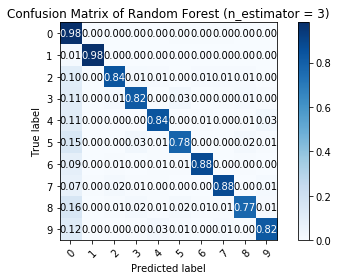

In [18]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1), classes=class_names, normalize=True,
                      title='Confusion Matrix of Random Forest (n_estimator = 3)')

plt.show()

# random forest (n_estimator = 30)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
predictions = rfc.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98       980
          1       1.00      0.98      0.99      1135
          2       0.98      0.88      0.93      1032
          3       0.99      0.87      0.93      1010
          4       1.00      0.88      0.93       982
          5       1.00      0.85      0.92       892
          6       1.00      0.93      0.96       958
          7       0.99      0.89      0.94      1028
          8       0.99      0.82      0.90       974
          9       0.99      0.87      0.93      1009

avg / total       0.99      0.89      0.94     10000



Normalized confusion matrix
[[9.99e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.02e-03
  0.00e+00 0.00e+00]
 [1.85e-02 9.80e-01 8.81e-04 8.81e-04 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00]
 [1.16e-01 0.00e+00 8.76e-01 0.00e+00 0.00e+00 0.00e+00 1.94e-03 3.88e-03
  1.94e-03 0.00e+00]
 [1.23e-01 0.00e+00 2.97e-03 8.67e-01 0.00e+00 9.90e-04 0.00e+00 1.98e-03
  2.97e-03 9.90e-04]
 [1.16e-01 0.00e+00 0.00e+00 0.00e+00 8.76e-01 0.00e+00 0.00e+00 0.00e+00
  1.02e-03 7.13e-03]
 [1.45e-01 0.00e+00 0.00e+00 4.48e-03 0.00e+00 8.46e-01 1.12e-03 1.12e-03
  2.24e-03 0.00e+00]
 [7.10e-02 1.04e-03 0.00e+00 0.00e+00 1.04e-03 0.00e+00 9.27e-01 0.00e+00
  0.00e+00 0.00e+00]
 [9.14e-02 0.00e+00 1.17e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 8.95e-01
  0.00e+00 1.95e-03]
 [1.74e-01 0.00e+00 0.00e+00 0.00e+00 1.03e-03 0.00e+00 1.03e-03 0.00e+00
  8.21e-01 3.08e-03]
 [1.24e-01 0.00e+00 0.00e+00 9.91e-04 1.98e-03 0.00e+00 0.00e+00 9.91e-04
  0.00e+00 8.72e-01]]


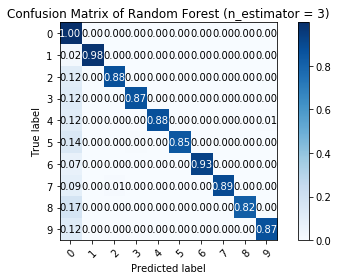

In [23]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1), classes=class_names, normalize=True,
                      title='Confusion Matrix of Random Forest (n_estimator = 3)')

plt.show()

# random forest (n_estimator = 60)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(n_estimators=60)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
predictions = rfc.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98       980
          1       1.00      0.98      0.99      1135
          2       0.99      0.89      0.94      1032
          3       1.00      0.87      0.93      1010
          4       0.99      0.89      0.94       982
          5       1.00      0.85      0.92       892
          6       1.00      0.92      0.96       958
          7       0.99      0.91      0.95      1028
          8       0.99      0.83      0.91       974
          9       0.99      0.88      0.93      1009

avg / total       0.99      0.90      0.94     10000



Normalized confusion matrix
[[9.99e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.02e-03
  0.00e+00 0.00e+00]
 [1.94e-02 9.79e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 8.81e-04 0.00e+00
  8.81e-04 0.00e+00]
 [1.06e-01 0.00e+00 8.90e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 3.88e-03
  9.69e-04 0.00e+00]
 [1.16e-01 0.00e+00 9.90e-04 8.74e-01 0.00e+00 1.98e-03 0.00e+00 2.97e-03
  2.97e-03 9.90e-04]
 [1.02e-01 0.00e+00 0.00e+00 0.00e+00 8.90e-01 0.00e+00 2.04e-03 0.00e+00
  1.02e-03 5.09e-03]
 [1.43e-01 0.00e+00 0.00e+00 1.12e-03 0.00e+00 8.54e-01 1.12e-03 0.00e+00
  0.00e+00 0.00e+00]
 [7.31e-02 1.04e-03 0.00e+00 0.00e+00 1.04e-03 0.00e+00 9.25e-01 0.00e+00
  0.00e+00 0.00e+00]
 [8.37e-02 0.00e+00 7.78e-03 0.00e+00 0.00e+00 0.00e+00 0.00e+00 9.07e-01
  0.00e+00 1.95e-03]
 [1.61e-01 0.00e+00 0.00e+00 0.00e+00 2.05e-03 0.00e+00 0.00e+00 0.00e+00
  8.35e-01 2.05e-03]
 [1.18e-01 1.98e-03 0.00e+00 9.91e-04 1.98e-03 0.00e+00 0.00e+00 9.91e-04
  0.00e+00 8.76e-01]]


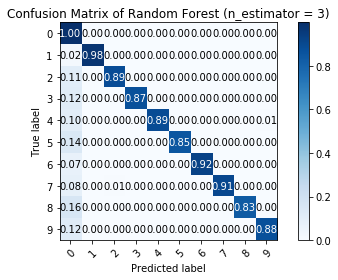

In [28]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1), classes=class_names, normalize=True,
                      title='Confusion Matrix of Random Forest (n_estimator = 3)')

plt.show()